# HDSC Winter'22 Stage C Tag along Project

# Name: Archana Yadav
# Hamoye ID: 147eb872a001f000

##Instructions for Tag-Along Project
###Stability of the Grid System

####Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy sources, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.

####Dataset: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

####It has 12 primary predictive features and two dependent variables.

####Predictive features:

####'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
####'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
####'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');

####Dependent variables:

####'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
####'stabf': a categorical (binary) label ('stable' or 'unstable').
####Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

####Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). Use scikit learn to train a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set. Answer the following questions:

In [103]:
#importing the necessary libraries
import pandas as pd
import lightgbm as lgbm
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report

In [104]:
# Fetch the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv'
Grid_sys = pd.read_csv(url)
Grid_sys.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [105]:
# Check for null values
Grid_sys.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [106]:
# As per the instruction given to drop the 'stab' columns
Grid_sys = Grid_sys.drop(columns = 'stab')

In [107]:
# Splitting the dataset into the Predictors(Features) and Labels

X = Grid_sys.drop(['stabf'],axis = 1)
y = Grid_sys['stabf']
Grid_sys.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [108]:
# Splitting the data into training and testing sets with 80-20 splitting respectively given in instructions

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)
print('Value count of train label:\n',y_train.value_counts(),'\n\n\nValue count of test label:\n',y_test.value_counts() )

Value count of train label:
 unstable    5092
stable      2908
Name: stabf, dtype: int64 


Value count of test label:
 unstable    1288
stable       712
Name: stabf, dtype: int64


In [109]:
X_train.head() 


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,6.255995,2.542401,7.024714,9.476518,3.529888,-1.224881,-0.688228,-1.616780,0.568221,0.618403,0.685739,0.660088
5140,5.070581,5.490253,8.075688,0.761075,4.220888,-1.280596,-1.902185,-1.038107,0.443515,0.097244,0.916955,0.129254
2568,1.220072,8.804028,3.874283,8.433949,3.614027,-1.039236,-0.953566,-1.621224,0.908353,0.923594,0.238881,0.660156
3671,7.498402,6.697603,8.798626,2.126236,3.134585,-1.581906,-0.589386,-0.963293,0.260826,0.899003,0.964752,0.600598
7427,7.074006,1.337511,6.100756,7.759156,2.526922,-0.922540,-0.632600,-0.971782,0.984580,0.716082,0.836928,0.165162


In [110]:
X_test.head() 


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9953,6.877876,4.113820,9.356768,8.299753,4.056779,-1.897470,-1.590581,-0.568728,0.276567,0.845536,0.112440,0.822562
3850,5.802841,6.271371,4.731540,3.819867,3.579569,-1.709480,-1.067511,-0.802579,0.077527,0.416478,0.912846,0.861306
4962,2.286998,4.385142,2.830232,5.293880,3.035814,-1.202764,-0.902011,-0.931039,0.924216,0.130186,0.703887,0.063811
3886,5.019920,2.209962,6.266080,0.578901,4.322584,-1.960207,-1.074561,-1.287815,0.546910,0.065992,0.427349,0.814648
5437,7.646145,9.187896,5.484219,9.934313,3.634226,-1.254541,-1.335366,-1.044319,0.561528,0.121611,0.787318,0.300314


In [111]:
# As per the instruction, here use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test).

scaler = StandardScaler()


# Transforming the X_train (feature)data
transformed_X_train = scaler.fit_transform(X_train)
transformed_X_train = pd.DataFrame(transformed_X_train, columns = X_train.columns)
transformed_X_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [112]:
# Transforming the X_test (feature)data
transformed_X_test = scaler.transform(X_test)
transformed_X_test = pd.DataFrame(transformed_X_test, columns = X_test.columns)
transformed_X_test.head() 

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.593951,-0.412733,1.503924,1.116943,0.403423,-1.492971,-0.785033,1.566781,-0.901007,1.167203,-1.507330,1.084726
1,0.202190,0.374416,-0.188800,-0.522268,-0.225967,-1.058483,0.420047,1.028627,-1.625721,-0.395660,1.414651,1.226011
2,-1.079044,-0.313745,-0.884634,0.017080,-0.943122,0.112653,0.801335,0.733004,1.457108,-1.438495,0.651821,-1.682168
3,-0.083120,-1.107327,0.372805,-1.708152,0.753990,-1.637972,0.403805,-0.088036,0.083322,-1.672322,-0.357714,1.055865
4,0.873921,1.438466,0.086662,1.715037,-0.153880,-0.007015,-0.197053,0.472315,0.136549,-1.469731,0.956396,-0.819727


##Question 14
### What is the accuracy on the test set using the random forest classifier? In 4 decimal places.

In [113]:
# As given instruction first we using Random Forest Classifier

Random_Forest = RandomForestClassifier(random_state=1)
Random_Forest.fit(transformed_X_train,y_train)

RandomForestClassifier(random_state=1)

In [114]:
RF_predict = Random_Forest.predict(transformed_X_test)
print("Accuracy on the test set using the Random Forest Classifier is {}".format(round(accuracy_score(y_test, RF_predict), 4)))

Accuracy on the test set using the Random Forest Classifier is 0.929


In [115]:
print('Confusion Matrix (Random Forest Classifier):\n\n',confusion_matrix(y_test, RF_predict))
print('\n\nClassification Report:\n\n',classification_report(y_test, RF_predict))


Confusion Matrix (Random Forest Classifier):

 [[ 625   87]
 [  55 1233]]


Classification Report:

               precision    recall  f1-score   support

      stable       0.92      0.88      0.90       712
    unstable       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [116]:
# Extra Tree Classifier
Tree_Class = ExtraTreesClassifier (random_state = 1)  
Tree_Class.fit(transformed_X_train,y_train)
ET_predict = Tree_Class.predict(transformed_X_test)
print("\nAccuracy score {}".format(accuracy_score(y_test, ET_predict)))


Accuracy score 0.928


In [117]:
print('Confusion Matrix (Extra Tree Classifier):\n\n',confusion_matrix(y_test, ET_predict))
print('\n\nClassification Report:\n\n',classification_report(y_test, ET_predict))
   # We can see here that the accuracy of the previous (New Optimal Model) is Lower than that without Hyperparameter Tuning


Confusion Matrix (Extra Tree Classifier):

 [[ 606  106]
 [  38 1250]]


Classification Report:

               precision    recall  f1-score   support

      stable       0.94      0.85      0.89       712
    unstable       0.92      0.97      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



##Question 12
###Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?


 

1.   N_estimators = 1000 , min_samples_split = 2 , min_samples_leaf = 8,max_features = None
2.   N_estimators = 500 , min_samples_split = 2 , min_samples_leaf = 8, max_features = ‘log2‘
3. N_estimators = 300 , min_samples_split = 5 , min_samples_leaf = 6, max_features = ‘auto’
4. N_estimators = 100 , min_samples_split = 7 , min_samples_leaf = 4, max_features = None

In [118]:
n_estimators = [100, 300, 500, 1000]    
min_samples_split = [7, 5, 2, 2]
min_samples_leaf = [4, 6, 8, 8]
max_features = [None,'auto','log2',None] 
hyperparameter_grid = {'n_estimators': n_estimators,  'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,'max_features': max_features}

In [119]:
# Randomized Search CV

Rand_search = RandomizedSearchCV(estimator = Tree_Class, param_distributions= hyperparameter_grid, random_state=1,cv = 5, n_iter=10,scoring='accuracy',n_jobs=-1, verbose=1)
search = Rand_search.fit(transformed_X_train,y_train)    

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [120]:
#checking for the best parameter for the model
search.best_params_

{'max_features': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 1000}

##Question 13
###Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?

In [121]:
feature_imp = search.best_estimator_.feature_importances_
print('Most important features:',max(zip(feature_imp,X)))
print('Least important features:',min(zip(feature_imp,X)))

Most important features: (0.13842145507674694, 'tau2')
Least important features: (0.005354328485013283, 'p1')


## Question 7
###Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?


####Answer: Lower than the initial ExtraTreesClassifier model with no hyperparameter tuning 

*Accuracy of ExtraTreesClassifier model with no hyperparameter tuning : 0.928*



*Accuracy of ExtraTreesClassifier model with hyperparameter tuning : 0.927*

In [122]:
#experimenting with this generated parameter to test the model's performance
ET_hyperparameter = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=None, random_state = 1)
ET_hyperparameter.fit(transformed_X_train, y_train)
ET_hyperparameter = ET_hyperparameter.predict(transformed_X_test)
print("Accuracy is:",accuracy_score(y_test, ET_hyperparameter))

Accuracy is: 0.927


In [123]:
print('Confusion Matrix (Extra Tree Classifier with Hyperparameter):\n\n',confusion_matrix(y_test, ET_hyperparameter))
print('\n\nClassification Report:\n\n',classification_report(y_test, ET_hyperparameter))

Confusion Matrix (Extra Tree Classifier with Hyperparameter):

 [[ 619   93]
 [  53 1235]]


Classification Report:

               precision    recall  f1-score   support

      stable       0.92      0.87      0.89       712
    unstable       0.93      0.96      0.94      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



##Question 12
###What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.

In [124]:
xg_boost = XGBClassifier(random_state =1)
xg_boost.fit(transformed_X_train, y_train)
xg_predict = xg_boost.predict(transformed_X_test)
print('The accuracy on the test set using the XGboost classifier is:',round(accuracy_score(y_test,xg_predict),4) )

The accuracy on the test set using the XGboost classifier is: 0.9195


In [125]:
print('Confusion Matrix (XGboost Classifier):\n\n',confusion_matrix(y_test, xg_predict))
print('\n\nClassification Report:\n\n',classification_report(y_test, xg_predict))

Confusion Matrix (XGboost Classifier):

 [[ 603  109]
 [  52 1236]]


Classification Report:

               precision    recall  f1-score   support

      stable       0.92      0.85      0.88       712
    unstable       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



##Question 3
###What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

In [126]:
lgbm = lgbm.LGBMClassifier(random_state=1)
lgbm.fit(transformed_X_train,y_train)
lgbm_predict  = lgbm.predict(transformed_X_test)
print('The accuracy on the test set using the LGBM classifier is:',round(accuracy_score(y_test, lgbm_predict),4))

The accuracy on the test set using the LGBM classifier is: 0.9375


In [127]:
print('Confusion Matrix (LGBM Classifier):\n\n',confusion_matrix(y_test, lgbm_predict))
print('\n\nClassification Report:\n\n',classification_report(y_test, lgbm_predict))

Confusion Matrix (LGBM Classifier):

 [[ 635   77]
 [  48 1240]]


Classification Report:

               precision    recall  f1-score   support

      stable       0.93      0.89      0.91       712
    unstable       0.94      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



##Question 8
###You are working on a spam classification system using regularized logistic regression. “Spam” is a positive class (y = 1) and “not spam” is the negative class (y = 0). You have trained your classifier and there are n = 1700 examples in the test set. The confusion matrix of predicted class vs. actual class is:

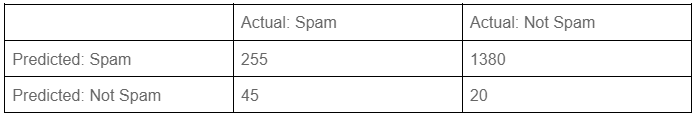


What is the F1 score of this classifier?

In [128]:
Precision = (255/ (255+1380)) 
Recall =  (255 /(255+45)) 
F1_Score = 2 * (Precision*Recall)/(Precision + Recall)
print(round(F1_Score,4))

0.2636
